In [1]:
#import the required Libraries

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor, LinearRegression

In [2]:
# Generate random data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.flatten() + 3 + np.random.randn(100) * 2

# Modify last 10 Data points to create outliers

X[90:] = X[90:] + 15
y[90:] = y[90:] - 20

In [3]:
#Instantiate and fit the ransac model
## residual threshold  = maximum acceptable error for a data point to be inlier

ransac = RANSACRegressor(LinearRegression(), residual_threshold=5, random_state=42)
ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), random_state=42,
                residual_threshold=5)

create a column vector (n x 1) with values starting from the minimum of X to the maximum of X, but not including the maximum value, and reshape mit into a 2D array with one column.

In [4]:
line_X = np.arange(X.min(), X.max())[:, np.newaxis]

In [5]:
# predict on the new 2d array
line_y_ransac = ransac.predict(line_X)

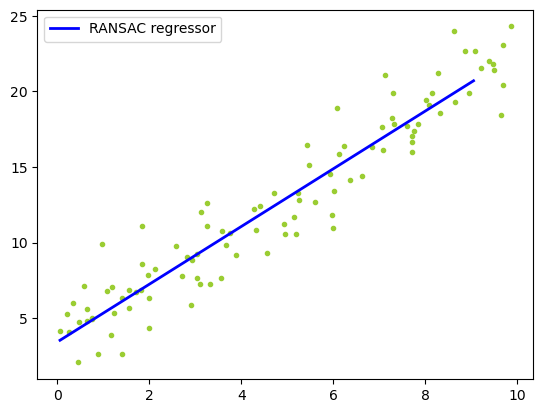

In [6]:
# visualize the predictions

plt.scatter(X, y, color="yellowgreen", marker=".")
plt.plot(line_X, line_y_ransac, color="blue", linewidth=2, label="RANSAC regressor")
plt.legend()
plt.show()